In [357]:
import pandas as pd
import numpy as np
from scipy.stats import binom, norm
from scipy.integrate import quad
from scipy.optimize import minimize
from src.sucess_probability import p_g

In [358]:
def calculate_my_likelihood(d_g, n_g, p_g, prob_dens_func, w_g, gamma_g):
    """
    Numerically calculates the value of L(d_g) based on the given formula.

    Parameters:
        d_g (int): Value of d_g.
        n_g (int): Value of n_g.
        p_g (callable): The p_g function representing the probability density function.
        prob_dens_func (callable): The pdf_g function representing the probability density function.
        w_g (float): Parameter 'w_g'.
        gamma_g (float): Parameter 'gamma_g'.

    Returns:
        float: Numerical approximation of the integral.
    """
    
    integrand = lambda x: binom.pmf(d_g, n_g, p_g(x, w_g, gamma_g)) * prob_dens_func(x)
    
    result, _ = quad(integrand, -5, 5)
    
    return result

In [359]:
# An example for the calculation of the likelihood
test_d_g = 5
test_n_g = 100
prob_dens_func = norm.pdf
test_w_g = 0.3
test_gamma_g = -1.6449

L_result = calculate_my_likelihood(test_d_g, test_n_g, p_g, prob_dens_func, test_w_g, test_gamma_g)
print(f"The value of L(d) for d = {test_d_g} and n = {test_n_g} is {L_result}")

The value of L(d) for d = 5 and n = 100 is 0.09923912975084864


In [360]:
def calculate_my_likelihood_arr(d_g_arr, n_g_arr, p_g, prob_dens_func, w_g_arr, gamma_g_arr):
    """
    Numerically calculates the value of L(d_g_arr) for multiple grades based on the given formula.

    Parameters:
        d_g_arr (numpy.array(int)): Values of d_g's by grades
        n_g_arr (numpy.array(int)): Values of n_g's by grades
        p_g (callable): The p_g function representing the probability density function.
        prob_dens_func (callable): The pdf_g function representing the probability density function.
        w_g_arr (numpy.array(float)): Parameter 'w_g's by grades
        gamma_g_arr (numpy.array(float)): Parameter 'gamma_g's by grades.

    Returns:
        float: Numerical approximation of the integral.
    """

    integrand = lambda x: np.prod(binom.pmf(d_g_arr, n_g_arr, p_g(x, w_g_arr, gamma_g_arr))) * prob_dens_func(x)

    #result, error_int = quad(integrand, -3, 3, epsabs=1.49e-28)
    result, error_int = quad(integrand, -3, 3)

    return result

In [361]:
d_g_list = [5, 5, 5]
n_g_list = [100, 200, 300]
w_g_list = [0.3, 0.3, 0.3]
gamma_g_list = [-1.6449, -1.6449, -1.6449]

L_result_list = calculate_my_likelihood_arr(np.array(d_g_list), np.array(n_g_list), p_g, norm.pdf, np.array(w_g_list), np.array(gamma_g_list))
print(L_result_list)

0.0003237475837191259


In [362]:
# Make d_g_array, n_g_array a 2 dimensional numpy array
d_g_array = np.array([[5, 10, 15], [7, 11, 17], [3, 9, 12]])
n_g_array = np.array([[100, 200, 300], [150, 250, 350], [120, 220, 320]])
w_g_list = np.array([0.3, 0.3, 0.3])
gamma_g_list = np.array([-1.6449, -1.6449, -1.6449])

In [363]:
# result = sum(np.log(calc_likelihood(d_g, n_g)) for d_g, n_g in zip(d_g_lista, n_g_lista))
# sum(np.log(calc_likelihood(d_g, n_g)) for d_g, n_g in zip(d_g_lista, n_g_lista))

In [364]:
for d, n in zip(d_g_array, n_g_array):
    print(d, n)

[ 5 10 15] [100 200 300]
[ 7 11 17] [150 250 350]
[ 3  9 12] [120 220 320]


In [365]:
sum(np.log(calculate_my_likelihood_arr(d_g_list, n_g_list, p_g, norm.pdf, w_g_list, gamma_g_list)) for d_g_list, n_g_list in zip(d_g_array, n_g_array))

-22.386025057721724

In [366]:
[np.log(calculate_my_likelihood_arr(d_g_list, n_g_list, p_g, norm.pdf, w_g_list, gamma_g_list)) for d_g_list, n_g_list in zip(d_g_array, n_g_array)]

[-7.376463928806655, -7.75409023347941, -7.25547089543566]

In [367]:
def log_likelihood(d_g_array, n_g_array, p_g, prob_dens_func, w_g_list, gamma_g_list):
    """
    Numerically calculates the value of log(L(d_g_array)) for multiple grades based on the given formula.

    Parameters:
        d_g_array (numpy.array(numpy.array(int))): Values of d_g's by grades
        n_g_array (numpy.array(numpy.array(int))): Values of n_g's by grades
        p_g (callable): The p_g function representing the probability density function.
        prob_dens_func (callable): The pdf_g function representing the probability density function.
        w_g_list (numpy.array(float)): Parameter 'w_g's by grades
        gamma_g_list (numpy.array(float)): Parameter 'gamma_g's by grades.

    Returns:
        float: Numerical approximation of the integral.
    """

    return sum(np.log(calculate_my_likelihood_arr(d_g_list, n_g_list, p_g, prob_dens_func, w_g_list, gamma_g_list)) for d_g_list, n_g_list in zip(d_g_array, n_g_array))

In [368]:
log_likelihood(d_g_array, n_g_array, p_g, norm.pdf, w_g_list, gamma_g_list)

-22.386025057721724

In [371]:
import numpy as np
from scipy.stats import norm


def p_g(x_g, w_g, gamma_g):
    """
    Calculates the success probability of a Bernoulli trial.

    Parameters:
        x_g (float): Input value.
        w_g (float or array-like): Parameter 'w_g'.
        gamma_g (float or array-like): Parameter 'gamma_g'.

    Returns:
        float or ndarray: Result of p_g(X_g).
    """
    # Ensure w_g and gamma_g are arrays for element-wise operations
    w_g = np.asarray(w_g)
    gamma_g = np.asarray(gamma_g)

    if isinstance(x_g, float):
        x_g = np.asarray([x_g])
    else:
        x_g = np.asarray(x_g)

    x_dim = len(x_g)
    w_dim = len(w_g)

    # Make w_g a x_dim x w_dim matrix where each row is the same
    w_g = np.tile(w_g, (x_dim, 1))
    # Make gamma_g a x_dim x w_dim matrix where each row is the same
    gamma_g = np.tile(gamma_g, (x_dim, 1))
    # Make x_g a x_dim x w_dim matrix where each column is the same
    x_g = np.tile(x_g, (w_dim, 1)).T

    result = norm.cdf((gamma_g - w_g * x_g) / np.sqrt(1 - w_g**2))

    return result

In [372]:
from scipy import stats

def monte_carlo_likelihood(w, gamma, d_list, n_list, num_samples=100000):
    """
    Calculates the likelihood of the given parameters w and gamma.

    Parameters:
        w (float): The weight parameter.
        gamma (float): The gamma parameter.
        d_list (list): List of d values.
        n_list (list): List of n values.
        num_samples (int): The number of samples to use in the Monte Carlo simulation.

    Returns:
        float: The likelihood of the parameters w and gamma.
    """
    # Generate random samples from the standard normal distribution
    random_samples = np.random.normal(size=num_samples)

    # likelihood function
    likelihood_func = lambda x: stats.binom.pmf(d_list, n_list, p_g(x, w_g=w, gamma_g=gamma))

    # Calculate the likelihood using the Monte Carlo simulation
    likelihood_values = likelihood_func(random_samples)
    row_products = np.prod(likelihood_values, axis=1)
    estimated_likelihood = np.mean(row_products)

    return estimated_likelihood

In [373]:
monte_carlo_likelihood(w_g_list, gamma_g_list, d_g_list, n_g_list, num_samples=100)

0.0003623457869670749

In [374]:
# num_samples = 10
# 
# random_samples = np.random.normal(size=num_samples)
# 
# likelihood_func = lambda x: stats.binom.pmf(d_g_list, n_g_list, p_g(x, w_g=w_g_list, gamma_g=gamma_g_list))
# 
# likelihood_values = likelihood_func(random_samples)
# row_products = np.prod(likelihood_values, axis=1)
# estimated_likelihood = np.mean(row_products)
# 
# estimated_likelihood

In [377]:
integral_value = calculate_my_likelihood_arr(np.array(d_g_list), np.array(n_g_list), p_g, norm.pdf, np.array(w_g_list), np.array(gamma_g_list))
integral_value

0.0003237475837191259

In [378]:
monte_carlo_likelihood(w_g_list, gamma_g_list, d_g_list, n_g_list, num_samples=500000)

0.0003244552948358669

In [379]:
mc_likelihood_values_10000 = [monte_carlo_likelihood(w_g_list, gamma_g_list, d_g_list, n_g_list, num_samples=10000) for _ in range(100)]
min(mc_likelihood_values_10000), max(mc_likelihood_values_10000), max(np.array(mc_likelihood_values_10000) - integral_value) / integral_value

(0.0003136981587417749, 0.0003329282213646104, 0.02835739355957435)

In [380]:
mc_likelihood_values_100000 = [monte_carlo_likelihood(w_g_list, gamma_g_list, d_g_list, n_g_list, num_samples=100000) for _ in range(100)]
min(mc_likelihood_values_100000), max(mc_likelihood_values_100000), max(np.array(mc_likelihood_values_100000) - integral_value) / integral_value

(0.00031973666221636615, 0.0003280486328180085, 0.013285192894641166)

In [386]:
np.mean((np.array(mc_likelihood_values_100000) - integral_value) / integral_value)

0.0002197627956311212

In [381]:
mc_likelihood_values_1000000 = [monte_carlo_likelihood(w_g_list, gamma_g_list, d_g_list, n_g_list, num_samples=1000000) for _ in range(100)]
min(mc_likelihood_values_1000000), max(mc_likelihood_values_1000000), max(np.array(mc_likelihood_values_1000000) - integral_value) / integral_value

(0.00032237636251964926, 0.00032482461711244955, 0.0033267689011017773)

In [382]:
%%timeit
calculate_my_likelihood_arr(np.array(d_g_list), np.array(n_g_list), p_g, norm.pdf, np.array(w_g_list), np.array(gamma_g_list))

41.1 ms ± 2.94 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [383]:
%%timeit
monte_carlo_likelihood(w_g_list, gamma_g_list, d_g_list, n_g_list, num_samples=500000)

456 ms ± 27.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [384]:
%%timeit
monte_carlo_likelihood(w_g_list, gamma_g_list, d_g_list, n_g_list, num_samples=100000)

85.5 ms ± 2.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [230]:
# Calculate the log likelihood for d_g_array, n_g_array row and return the sum
d_g_sum = np.sum(d_g_array, axis=0)
n_g_sum = np.sum(n_g_array, axis=0)
log_likelihood(d_g_sum, n_g_sum, p_g, norm.pdf, w_g_list, gamma_g_list)

-28.438610683551424

In [259]:
def parameter_estimation(default_table, num_of_obligors_table, factor_loading_init, gamma_list_init, fixed_w=False):
    if not fixed_w:
        initial_guess = gamma_list_init + factor_loading_init
    
        num_of_gamma = len(gamma_list_init)
        num_of_factor_loading = len(factor_loading_init)
        bounds = num_of_gamma * [(-5, 5)] + num_of_factor_loading * [(-1, 1)]
        # Optimization
        objective_function = lambda params: -log_likelihood(
            default_table, num_of_obligors_table, p_g, norm.pdf,
            params[num_of_gamma:num_of_gamma+num_of_factor_loading], params[0:num_of_gamma]
        )
    
        result = minimize(objective_function,
                          initial_guess,
                          method="Nelder-Mead",
                          bounds=bounds,
                          options={
                              'disp': False})
        
    else:
        initial_guess = gamma_list_init
    
        num_of_gamma = len(gamma_list_init)
        bounds = num_of_gamma * [(-5, 5)]
        # Optimization
        objective_function = lambda params: -log_likelihood(
            default_table, num_of_obligors_table, p_g, norm.pdf,
            factor_loading_init, params
        )
    
        result = minimize(objective_function,
                          initial_guess,
                          method="Nelder-Mead",
                          bounds=bounds,
                          options={
                              'disp': False})

    return result

In [97]:
# Load the data
grades_data = pd.read_csv('data/grades_hist_pd.csv', sep=';', index_col=0)

for col_name in grades_data.columns:
    grades_data[col_name] = grades_data[col_name] / 100
    
grades_cols = grades_data.columns

n_g_assumption = 3000

for col_name in grades_cols:
    grades_data[str(col_name) + " defaults"] = np.round((n_g_assumption * grades_data[col_name]), 0)

In [105]:
grades_data.iloc[15:20]

,AAA,AA,A,BBB,BB,B,CCC/C,AAA defaults,AA defaults,A defaults,BBB defaults,BB defaults,B defaults,CCC/C defaults
Year,,,,,,,,,,,,,,
1996,0.0,0.0000,0.0000,0.0000,0.0045,0.0291,0.0800,0.0,0.0,0.0,0.0,14.0,87.0,240.0
1997,0.0,0.0000,0.0000,0.0025,0.0019,0.0352,0.1200,0.0,0.0,0.0,8.0,6.0,106.0,360.0
1998,0.0,0.0000,0.0000,0.0041,0.0082,0.0464,0.4286,0.0,0.0,0.0,12.0,25.0,139.0,1286.0
1999,0.0,0.0017,0.0018,0.0020,0.0095,0.0731,0.3382,0.0,5.0,5.0,6.0,28.0,219.0,1015.0
2000,0.0,0.0000,0.0027,0.0037,0.0116,0.0771,0.3596,0.0,0.0,8.0,11.0,35.0,231.0,1079.0


In [112]:
# grade_list = ["A", "BBB", "BB", "B", "CCC/C"]
grade_list = ["BBB", "BB", "B", "CCC/C"]
default_table = grades_data[[str(grade) + " defaults" for grade in grade_list]][15:20].values
num_of_obligors_table = n_g_assumption * np.ones(default_table.shape)

In [113]:
default_table

array([[   0.,   14.,   87.,  240.],
       [   8.,    6.,  106.,  360.],
       [  12.,   25.,  139., 1286.],
       [   6.,   28.,  219., 1015.],
       [  11.,   35.,  231., 1079.]])

In [114]:
from src.MM_estimation import estimate_w_factor_loading

MM_params = {}
for index, grade in enumerate(grade_list):
    MM_params[grade] = estimate_w_factor_loading(grades_data[grade][15:20], num_of_obligors_table[:, index], initial_guess=0.45)
    print(f"Estimated parameters with method of moments for grade {grade}:", MM_params[grade][0], norm.ppf(MM_params[grade][1]))

Estimated parameters with method of moments for grade BBB: 0.14217022899691226 -2.8122254843755643
Estimated parameters with method of moments for grade BB: 0.15277536809488443 -2.450141713617395
Estimated parameters with method of moments for grade B: 0.17577928739484128 -1.6240740759125745
Estimated parameters with method of moments for grade CCC/C: 0.4153954009093961 -0.6271513955104665


In [115]:
MM_w_params = [MM_params[grade][0] for grade in grade_list]
MM_gamma_params = [norm.ppf(MM_params[grade][1]) for grade in grade_list]

In [122]:
MM_gamma_params

[-2.8122254843755643,
 -2.450141713617395,
 -1.6240740759125745,
 -0.6271513955104665]

In [117]:
parameter_estimation_results = parameter_estimation(default_table, num_of_obligors_table, [0.15], MM_gamma_params)

In [147]:
print("Estimated parameters with maximum likelihood estimation:", parameter_estimation_results.x)
print("Current function value: ", parameter_estimation_results.fun)

Estimated parameters with maximum likelihood estimation: [-2.80589814 -2.4443555  -1.62080036 -0.63965098  0.30728916]
Current function value:  224.85128569575315


In [120]:
parameter_estimation_results2 = parameter_estimation(default_table, num_of_obligors_table, [0.35], MM_gamma_params)

In [146]:
print("Estimated parameters with maximum likelihood estimation:", parameter_estimation_results2.x)
print("Current function value: ", parameter_estimation_results2.fun)

Estimated parameters with maximum likelihood estimation: [-2.81016211 -2.45164086 -1.63491463 -0.66198896  0.33084744]
Current function value:  224.5991859258468


In [142]:
factor_loading_init = [0.15]
gamma_list_init = [-2.78, -2.4, -1.65, -0.65]
parameter_estimation_results3 = parameter_estimation(default_table, num_of_obligors_table, factor_loading_init, gamma_list_init)

In [145]:
print("Estimated parameters with maximum likelihood estimation:", parameter_estimation_results3.x)
print("Current function value: ", parameter_estimation_results3.fun)

Estimated parameters with maximum likelihood estimation: [-2.91382846 -2.54797082 -1.71456421 -0.72179644  0.26977909]
Current function value:  225.59423176350913


# More years

In [209]:
grade_list = ["BBB", "BB", "B", "CCC/C"]
default_table2 = grades_data[[str(grade) + " defaults" for grade in grade_list]][10:25].values
num_of_obligors_table2 = n_g_assumption * np.ones(default_table2.shape)

MM_params2 = {}
for index, grade in enumerate(grade_list):
    MM_params2[grade] = estimate_w_factor_loading(grades_data[grade][10:25], num_of_obligors_table2[:, index], initial_guess=0.45)
    print(f"Estimated parameters with method of moments for grade {grade}:", MM_params2[grade][0], norm.ppf(MM_params2[grade][1]))

MM_w_params2 = [MM_params2[grade][0] for grade in grade_list]
MM_gamma_params2 = [norm.ppf(MM_params2[grade][1]) for grade in grade_list]

Estimated parameters with method of moments for grade BBB: 0.2871042568995872 -2.8192678569031986
Estimated parameters with method of moments for grade BB: 0.29623347361649804 -2.3403307919949556
Estimated parameters with method of moments for grade B: 0.2907680286037583 -1.5877922110756781
Estimated parameters with method of moments for grade CCC/C: 0.379811113708008 -0.6170324331494975


In [210]:
w_init_more_year = [0.30]
g_init_more_year = [-2.78, -2.4, -1.65, -0.65]
parameter_estimation_more_year = parameter_estimation(default_table2, num_of_obligors_table2, w_init_more_year, g_init_more_year)

In [211]:
print("Estimated parameters with maximum likelihood estimation:", parameter_estimation_more_year.x)
print("Current function value: ", parameter_estimation_more_year.fun)

Estimated parameters with maximum likelihood estimation: [-2.85930182 -2.38349712 -1.63596839 -0.67646472  0.33851023]
Current function value:  546.8122419719294


# Optimal log likelihood function value for different w values (fixed w)

In [198]:
w_values = np.linspace(0.0, 0.5, 11)
params_dict = {}

for w in w_values:
    ML_linear_estimation = parameter_estimation(default_table, num_of_obligors_table, [w], gamma_list_init, fixed_w=True)
    params_dict[w] = (ML_linear_estimation.x, ML_linear_estimation.fun)
    print("w value:", w)
    print("Estimated parameters with maximum likelihood method:", ML_linear_estimation.x)
    print("Current function value:", ML_linear_estimation.fun)

w value: 0.0
Estimated parameters with maximum likelihood method: [-2.8113551  -2.44709756 -1.62451962 -0.62700372]
Current function value: 951.8418250479406
w value: 0.05
Estimated parameters with maximum likelihood method: [-2.86377324 -2.49837454 -1.66861943 -0.66852668]
Current function value: 521.4644075605341
w value: 0.1
Estimated parameters with maximum likelihood method: [-2.94127995 -2.57089818 -1.72476982 -0.71320265]
Current function value: 292.51302395808654
w value: 0.15000000000000002
Estimated parameters with maximum likelihood method: [-3.00194285 -2.62719346 -1.77343467 -0.75617626]
Current function value: 234.84270176496318
w value: 0.2
Estimated parameters with maximum likelihood method: [-2.860881   -2.48903087 -1.64199654 -0.63273594]
Current function value: 228.26752042204933
w value: 0.25
Estimated parameters with maximum likelihood method: [-2.84462058 -2.4769042  -1.63929977 -0.64141282]
Current function value: 225.93620582690713
w value: 0.30000000000000004
E

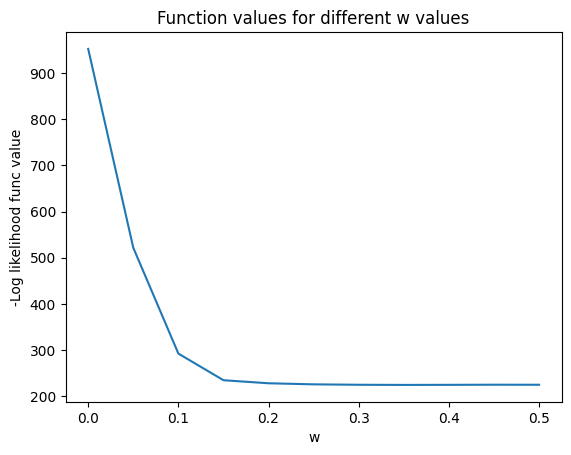

In [203]:
# Make a plot of the function values
import matplotlib.pyplot as plt

w_values = list(params_dict.keys())
function_values = [params_dict[w][1] for w in w_values]

plt.plot(w_values, function_values)
plt.xlabel("w")
plt.ylabel("-Log likelihood func value")
plt.title("Function values for different w values")
plt.show()

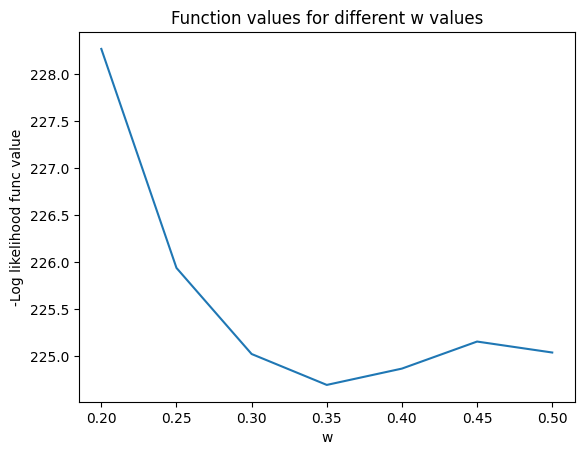

In [202]:
plt.plot(w_values[4:], function_values[4:])
plt.xlabel("w")
plt.ylabel("-Log likelihood func value")
plt.title("Function values for different w values")
plt.show()

In [ ]:
gamma_list_init

In [ ]:
MM_gamma_params

In [199]:
w_values = np.linspace(0.0, 0.5, 11)
params_dict2 = {}

for w in w_values:
    ML_linear_estimation = parameter_estimation(default_table, num_of_obligors_table, [w], MM_gamma_params, fixed_w=True)
    params_dict2[w] = (ML_linear_estimation.x, ML_linear_estimation.fun)
    print("w value:", w)
    print("Estimated parameters with maximum likelihood method:", ML_linear_estimation.x)
    print("Current function value:", ML_linear_estimation.fun)

w value: 0.0
Estimated parameters with maximum likelihood method: [-2.8113877  -2.44712465 -1.62450518 -0.62698744]
Current function value: 951.841823903839
w value: 0.05
Estimated parameters with maximum likelihood method: [-2.86381916 -2.49826265 -1.66861244 -0.66852065]
Current function value: 521.4644089485402
w value: 0.1
Estimated parameters with maximum likelihood method: [-2.94123533 -2.57086143 -1.72475556 -0.71320994]
Current function value: 292.51302312544243
w value: 0.15000000000000002
Estimated parameters with maximum likelihood method: [-3.00185306 -2.62720709 -1.77340231 -0.75618785]
Current function value: 234.84270143350875
w value: 0.2
Estimated parameters with maximum likelihood method: [-2.86088014 -2.48908056 -1.64204017 -0.63274491]
Current function value: 228.26752187312013
w value: 0.25
Estimated parameters with maximum likelihood method: [-2.84454283 -2.47695288 -1.63932502 -0.64137854]
Current function value: 225.93620782470745
w value: 0.30000000000000004
Es

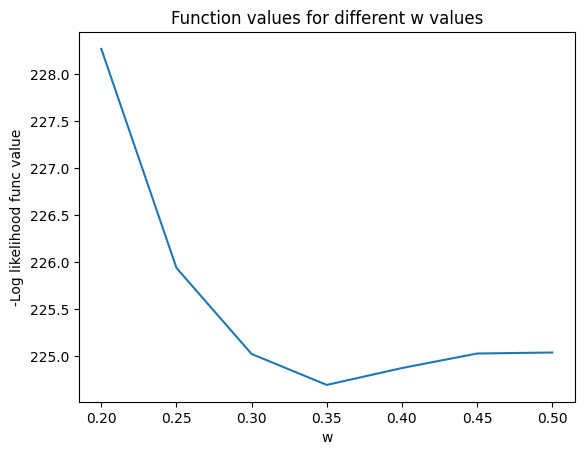

In [204]:
# Plot
w_values = list(params_dict2.keys())
function_values = [params_dict2[w][1] for w in w_values]

# from 0.2 to 0.5
plt.plot(w_values[4:], function_values[4:])
plt.xlabel("w")
plt.ylabel("-Log likelihood func value")
plt.title("Function values for different w values")
plt.show()

In [207]:
# Make one dataframe from the 2 dictionaries, where index column is w
df1 = pd.DataFrame.from_dict(params_dict, orient='index', columns=['Parameters', 'MM_init function value'])
df2 = pd.DataFrame.from_dict(params_dict2, orient='index', columns=['Parameters', 'Other init function value'])

# Merge the dataframes
df = pd.merge(df1, df2, left_index=True, right_index=True)
df

,Parameters_x,MM_init function value,Parameters_y,Other init function value
0.00,"[-2.8113550995411067, -2.4470975608800956, -1....",951.841825,"[-2.811387702570853, -2.447124647088103, -1.62...",951.841824
0.05,"[-2.8637732417927335, -2.4983745432444864, -1....",521.464408,"[-2.8638191617916235, -2.4982626474404475, -1....",521.464409
0.10,"[-2.9412799505561757, -2.570898183493422, -1.7...",292.513024,"[-2.9412353265878437, -2.57086143206931, -1.72...",292.513023
0.15,"[-3.0019428546196534, -2.627193455833382, -1.7...",234.842702,"[-3.001853063218107, -2.627207093286013, -1.77...",234.842701
0.20,"[-2.860881001335562, -2.4890308730365986, -1.6...",228.267520,"[-2.86088014194486, -2.4890805562805296, -1.64...",228.267522
0.25,"[-2.844620575170459, -2.476904196409147, -1.63...",225.936206,"[-2.8445428348401722, -2.476952879995685, -1.6...",225.936208
0.30,"[-2.807227233007618, -2.445114783725117, -1.62...",225.019781,"[-2.8072552868032377, -2.445179490982431, -1.6...",225.019780
0.35,"[-2.8164477217493635, -2.46106103224298, -1.65...",224.690757,"[-2.816516006022398, -2.461051053036455, -1.65...",224.690758
0.40,"[-2.732566261397607, -2.3711290986687166, -1.5...",224.864603,"[-2.7247647541486772, -2.371576452178613, -1.5...",224.870296
0.45,"[-2.718031938832671, -2.379467569111247, -1.60...",225.152421,"[-2.713384790538129, -2.3651962650102023, -1.5...",225.024992


In [205]:
w_values = np.linspace(0.0, 0.5, 6)
params_dict3 = {}

for w in w_values:
    ML_linear_estimation = parameter_estimation(default_table, num_of_obligors_table, [w], MM_gamma_params)
    params_dict3[w] = (ML_linear_estimation.x, ML_linear_estimation.fun)
    print("w value:", w)
    print("Estimated parameters with maximum likelihood method:", ML_linear_estimation.x)
    print("Current function value:", ML_linear_estimation.fun)

w value: 0.0
Estimated parameters with maximum likelihood method: [-3.08694904 -2.7210572  -1.88757822 -0.89479295  0.26953964]
Current function value: 227.52987116711242
w value: 0.1
Estimated parameters with maximum likelihood method: [-2.81031515 -2.45168448 -1.63501256 -0.66204875  0.33093446]
Current function value: 224.59919905659865
w value: 0.2
Estimated parameters with maximum likelihood method: [-2.9555208  -2.59700579 -1.78018622 -0.80723205  0.33078134]
Current function value: 225.2022535841715
w value: 0.30000000000000004
Estimated parameters with maximum likelihood method: [-2.80594771 -2.44440308 -1.62080364 -0.63966877  0.30728579]
Current function value: 224.8512850274912
w value: 0.4
Estimated parameters with maximum likelihood method: [-2.7213582  -2.37742049 -1.59394175 -0.66061332  0.42490634]
Current function value: 224.33532511267677
w value: 0.5
Estimated parameters with maximum likelihood method: [-2.70292629 -2.36685492 -1.60105541 -0.68888868  0.46608652]
Cur

In [196]:
# Test results
-log_likelihood(default_table, num_of_obligors_table, p_g, norm.pdf, [0.1], list(params_dict[0.1][0]))

292.51302395808654

# Variable Change

In [148]:
def calculate_variable_changed_likelihood_arr(d_g_arr, n_g_arr, p_g, prob_dens_func, a, b):
    integrand = lambda x: np.prod(binom.pmf(d_g_arr, n_g_arr, norm.cdf(a*x+b))) * prob_dens_func(x)

    result, _ = quad(integrand, -3, 3, epsabs=1.49e-28)

    return result

In [149]:
def log_likehood_variable_changed(d_g_array, n_g_array, p_g, prob_dens_func, a, b):
    return sum(np.log(calculate_variable_changed_likelihood_arr(d_g_list, n_g_list, p_g, prob_dens_func, a, b)) for d_g_list, n_g_list in zip(d_g_array, n_g_array))

In [175]:
from src.variable_change import a_calc_func, b_calc_func, w_calc_func, gamma_calc_func

a_MM = a_calc_func(np.array(MM_w_params), np.array(MM_gamma_params))
b_MM = b_calc_func(np.array(MM_w_params), np.array(MM_gamma_params))

a_MM, b_MM

(array([-0.14362918, -0.15459011, -0.17855953, -0.45665864]),
 array([-2.84108459, -2.47924573, -1.64976152, -0.68944939]))

In [178]:
log_likehood_variable_changed(default_table[:, 1], num_of_obligors_table[:, 1], p_g, norm.pdf, a_MM, b_MM)

-519.8256850722457

In [219]:
def parameter_estimation_variable_changed(default_table, num_of_obligors_table, a_init, b_init, fixed_a = False):
    if not fixed_a:
        initial_guess = np.concatenate((a_init, b_init))
    
        num_of_a = len(a_init)
        bounds = [(-10, 10)] * len(initial_guess)
    
        # Optimization
        objective_function = lambda params: -log_likehood_variable_changed(
            default_table, num_of_obligors_table, p_g, norm.pdf, params[:num_of_a], params[num_of_a:len(initial_guess)]
        )
    
        result = minimize(objective_function,
                          initial_guess,
                          method="Nelder-Mead",
                          bounds=bounds,
                          options={
                              'disp': False})
    
    else:
        initial_guess = b_init
        
        bounds = [(-10, 10)] * len(initial_guess)
    
        # Optimization
        objective_function = lambda params: -log_likehood_variable_changed(
            default_table, num_of_obligors_table, p_g, norm.pdf, a_init, params
        )
    
        result = minimize(objective_function,
                          initial_guess,
                          method="Nelder-Mead",
                          bounds=bounds,
                          options={
                              'disp': False})

    return result

In [181]:
parameter_estimation_a_b_results = parameter_estimation_variable_changed(default_table, num_of_obligors_table, [-0.15], b_MM)

In [182]:
print("Estimated parameters with maximum likelihood estimation:", parameter_estimation_a_b_results.x)
print("Current function value: ", parameter_estimation_a_b_results.fun)
print("Parameters as w: ", w_calc_func(parameter_estimation_a_b_results.x[:1], parameter_estimation_a_b_results.x[1:]))
print("Parameters as gamma: ", gamma_calc_func(parameter_estimation_a_b_results.x[:1], parameter_estimation_a_b_results.x[1:]))

Estimated parameters with maximum likelihood estimation: [-0.27948214 -3.08684671 -2.70689225 -1.84136415 -0.81038667]
Current function value:  225.99606156548163
Parameters as w:  [0.26916741]
Parameters as gamma:  [-2.97292171 -2.60699007 -1.77340567 -0.78047806]


In [223]:
parameter_estimation_a_b_results2 = parameter_estimation_variable_changed(default_table, num_of_obligors_table, [-0.25], b_MM)

In [224]:
print("Estimated parameters with maximum likelihood estimation:", parameter_estimation_a_b_results2.x)
print("Current function value: ", parameter_estimation_a_b_results2.fun)
print("Parameters as w: ", w_calc_func(parameter_estimation_a_b_results2.x[:1], parameter_estimation_a_b_results2.x[1:]))
print("Parameters as gamma: ", gamma_calc_func(parameter_estimation_a_b_results2.x[:1], parameter_estimation_a_b_results2.x[1:]))

Estimated parameters with maximum likelihood estimation: [-0.35127112 -3.05493831 -2.67499237 -1.8095039  -0.77852131]
Current function value:  224.7544641130218
Parameters as w:  [0.33141862]
Parameters as gamma:  [-2.88228483 -2.52381199 -1.70723763 -0.73452225]


In [226]:
a_values = np.linspace(0, -0.7, 15)

params_dict_a = {}

for a in a_values:
    ML_linear_estimation = parameter_estimation_variable_changed(default_table, num_of_obligors_table, np.array([a]), b_MM, fixed_a=True)
    params_dict_a[a] = (ML_linear_estimation.x, ML_linear_estimation.fun)
    print("a value:", a)
    print("Estimated parameters with maximum likelihood method:", ML_linear_estimation.x)
    print("Current function value:", ML_linear_estimation.fun)

a value: 0.0
Estimated parameters with maximum likelihood method: [-2.81135156 -2.44705722 -1.62448793 -0.62699047]
Current function value: 951.8418266659414
a value: -0.049999999999999996
Estimated parameters with maximum likelihood method: [-2.86727761 -2.5013625  -1.67063056 -0.66932674]
Current function value: 521.892725483333
a value: -0.09999999999999999
Estimated parameters with maximum likelihood method: [-2.95522304 -2.58300541 -1.73283312 -0.71637062]
Current function value: 293.74193547536106
a value: -0.15
Estimated parameters with maximum likelihood method: [-3.03572368 -2.65682259 -1.79351217 -0.76483534]
Current function value: 235.32638542413522
a value: -0.19999999999999998
Estimated parameters with maximum likelihood method: [-2.95409046 -2.57444242 -1.70971853 -0.67941914]
Current function value: 228.37032216514473
a value: -0.24999999999999997
Estimated parameters with maximum likelihood method: [-2.92772507 -2.54795799 -1.68288344 -0.65228865]
Current function valu

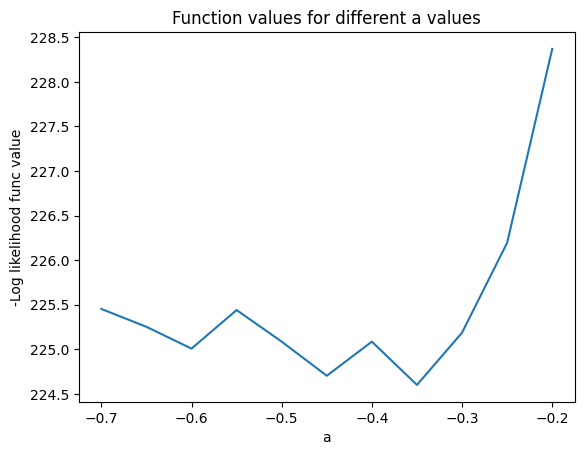

In [239]:
# Plot
a_values = list(params_dict_a.keys())
function_values = [params_dict_a[a][1] for a in a_values]

# Show y label between 200 and 250
plt.plot(a_values[4:], function_values[4:])
plt.xlabel("a")
plt.ylabel("-Log likelihood func value")
#plt.ylim(220, 235)
plt.title("Function values for different a values")
plt.show()

In [253]:
# b_MM =
b_calc_func(np.array(MM_w_params), np.array(MM_gamma_params))

array([-2.84108459, -2.47924573, -1.64976152, -0.68944939])

C:\Users\kissp\AppData\Local\Temp\ipykernel_17856\3548883320.py:4: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result, _ = quad(integrand, -3, 3, epsabs=1.49e-28)


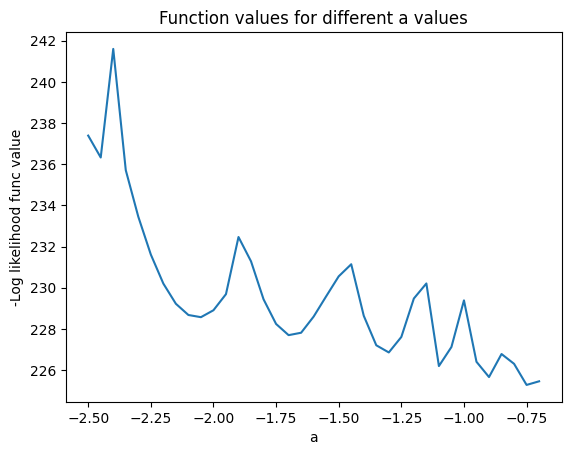

In [256]:
a_values_prec = np.linspace(-2.5, -0.7, 37)
b_init = np.array([-2.78, -2.4, -1.65, -0.65])

params_dict_a_prec = {}

for a in a_values_prec:
    ML_linear_estimation = parameter_estimation_variable_changed(default_table, num_of_obligors_table, np.array([a]), b_init, fixed_a=True)
    params_dict_a_prec[a] = (ML_linear_estimation.x, ML_linear_estimation.fun)

# Plot
a_values_prec = list(params_dict_a_prec.keys())
function_values_prec = [params_dict_a_prec[a][1] for a in a_values_prec]

plt.plot(a_values_prec, function_values_prec)
plt.xlabel("a")
plt.ylabel("-Log likelihood func value")
plt.title("Function values for different a values")
plt.show()

C:\Users\kissp\AppData\Local\Temp\ipykernel_17856\405473469.py:2: RuntimeWarning: divide by zero encountered in log
  return sum(np.log(calculate_variable_changed_likelihood_arr(d_g_list, n_g_list, p_g, prob_dens_func, a, b)) for d_g_list, n_g_list in zip(d_g_array, n_g_array))


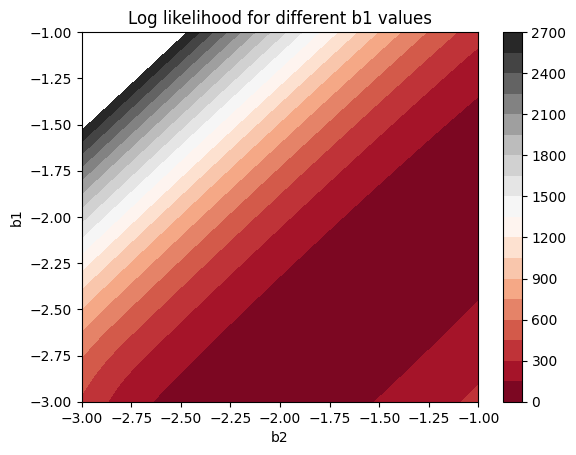

In [246]:
# Fix a and plot the likelihood function in b1 and b2

a_fixed_value = -0.35

b1_prec = np.linspace(-3, -1, 31)
b2_prec = np.linspace(-3, -1, 31)

z_values_b1_b2_prec = np.zeros((len(b1_prec), len(b2_prec)))

for i, x in enumerate(b1_prec):
    for j, y in enumerate(b2_prec):
        z_values_b1_b2_prec[i, j] = -log_likehood_variable_changed(default_table[:,1:3], num_of_obligors_table[:, 1:3], p_g, norm.pdf, np.array([a_fixed_value, a_fixed_value]), np.array([x, y]))

plt.contourf(b1_prec, b2_prec, z_values_b1_b2_prec, 20, cmap='RdGy')
plt.colorbar()
plt.xlabel("b2")
plt.ylabel("b1")
plt.title("Log likelihood for different b1 values")
plt.show()

In [ ]:
b1_zoom = np.linspace(-2.5, -1.5, 21)
b2_zoom = np.linspace(-2.5, -1.5, 21)

z_values_b1_b2_zoom = np.zeros((len(b1_zoom), len(b2_zoom)))

for i, x in enumerate(b1_zoom):
    for j, y in enumerate(b2_zoom):
        z_values_b1_b2_zoom[i, j] = -log_likehood_variable_changed(default_table[:,1:3], num_of_obligors_table[:, 1:3], p_g, norm.pdf, np.array([a_fixed_value, a_fixed_value]), np.array([x, y]))

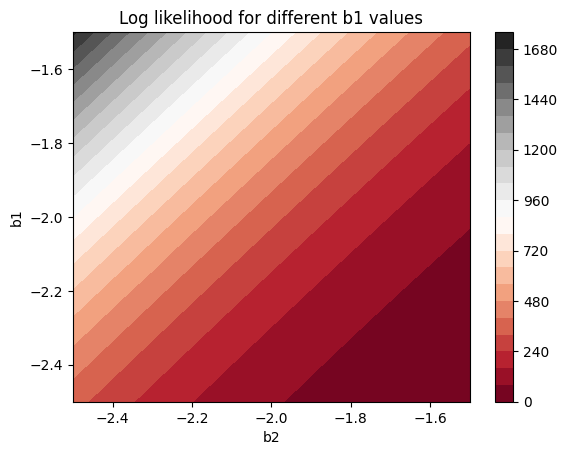

In [252]:
plt.contourf(b1_zoom, b2_zoom, z_values_b1_b2_zoom, 20, cmap='RdGy')
plt.colorbar()
plt.xlabel("b2")
plt.ylabel("b1")
plt.title("Log likelihood for different b1 values")
plt.show()